In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def main(filetobechecked):
    
# Reading the data
    data = pd.read_csv(filetobechecked)

# Extract feature(s) (x) and target variable (y)
    x = data[['Pclass','Age','Siblings/Spouses Aboard','Parents/Children Aboard','Fare']]
    y = data['Survived']
#irrelevant
    x2 = data['Name']
    x3 = data[ 'Sex']


# Feature scaling to make more accurate
    def feature_scaling(a):
        a = (a - a.mean()) / a.std()
        return a

    x=feature_scaling(x)


# Convert to NumPy arrays
    x_array = x.values
    y_array = y.values

    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    def accuracy(features, targets, weights, bias):
        polynomial = np.dot(features, weights) + bias
        prediction = 1 / (1 + np.exp(-polynomial))
        prediction = (prediction > 0.5).astype(int)
        acc = np.sum(prediction == targets) / len(targets) * 100
        return acc

    def gradient_descent(X, y, theta, learning_rate, num_iterations, lambda_):
        m, n = X.shape
        acc = np.empty(num_iterations)
        for i in range(num_iterations):
            z = np.dot(X, theta)
            f_mc = sigmoid(z)


            err = f_mc - y

            acc[i] = accuracy(X, y, theta, theta[0])

            dm = np.dot(X.T, err) / m
            dc = np.sum(err) / m

            # Add regularization term to the gradient with respect to the slope coefficients
            # dm[1:] += (lambda_ / m) * theta[1:]

            # Update parameters using the learning rate
            theta -= learning_rate * dm
            theta[0] -= learning_rate * dc

            # Check for nan in weights
            if np.isnan(np.sum(theta)):
                print("Weights became nan. Stopping optimization.")
                break   

        return theta, acc

    # Initialize weights with small random values
    initial_theta = np.random.rand(x_array.shape[1]) * 0.01
    learning_rate = 0.005  # Further reduce the learning rate
    num_iterations = 1000
    lambda_ = 0.1

    # Perform gradient descent
    theta, acc = gradient_descent(x_array, y_array, initial_theta, learning_rate, num_iterations, lambda_)
    print(acc)
    # Predict probabilities
    predicted_probs = sigmoid(np.clip(np.dot(x_array, theta), -5000, 5000))  # Clip values to prevent overflow




    # new Sigmoid function to make the blue curved line in the graph
    #this set of code is irrelevant to the code
    #it is to make an artificial blue curved line 
    def sigmoid2(z):
        return 1 / (1 + np.exp(-z))
    # Generate x values
    x_values = np.linspace(-10, 10, 100)  # Create 100 points between -10 and 10
    # Calculate corresponding y values using the sigmoid function
    y_values = sigmoid2(x_values)


    # Plot 1 to show the predictions and no. of survived and dead
    plt.scatter(predicted_probs, y, color="blue")
    plt.xlabel("Predicted Probabilities")
    plt.ylabel("Actual Values")
    plt.title("Blue dots show no. of survived and dead")
    plt.show()

    # Plot 2 to show in the form of sigmoid fn graph
    plt.scatter(predicted_probs, y, color="red")
    plt.plot(x_values, y_values, label='Sigmoid Function', color='blue')
    plt.xlabel("Predicted Probabilities")
    plt.ylabel("Actual Values")
    plt.show()

[35.87521664 47.14038128 54.93934142 59.27209705 60.48526863 62.39168111
 63.77816291 64.12478336 64.12478336 63.95147314 64.29809359 64.29809359
 64.64471404 64.47140381 64.29809359 64.47140381 64.29809359 64.29809359
 64.29809359 64.29809359 64.29809359 64.29809359 64.29809359 64.29809359
 64.29809359 64.29809359 64.29809359 64.29809359 64.29809359 64.29809359
 64.29809359 64.29809359 64.29809359 64.29809359 64.29809359 64.29809359
 64.29809359 64.29809359 64.29809359 64.29809359 64.29809359 64.29809359
 64.29809359 64.29809359 64.29809359 64.29809359 64.29809359 64.29809359
 64.29809359 64.29809359 64.29809359 64.29809359 64.29809359 64.29809359
 64.29809359 64.29809359 64.29809359 64.29809359 64.29809359 64.29809359
 64.29809359 64.29809359 64.29809359 64.29809359 64.29809359 64.29809359
 64.29809359 64.29809359 64.29809359 64.29809359 64.29809359 64.29809359
 64.29809359 64.47140381 64.47140381 64.47140381 64.47140381 64.47140381
 64.47140381 64.64471404 64.64471404 64.64471404 64

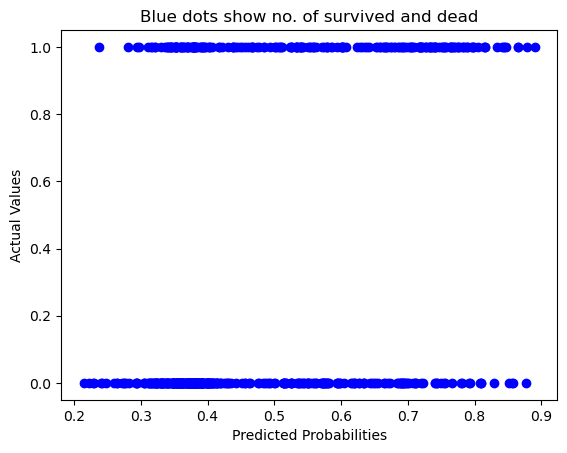

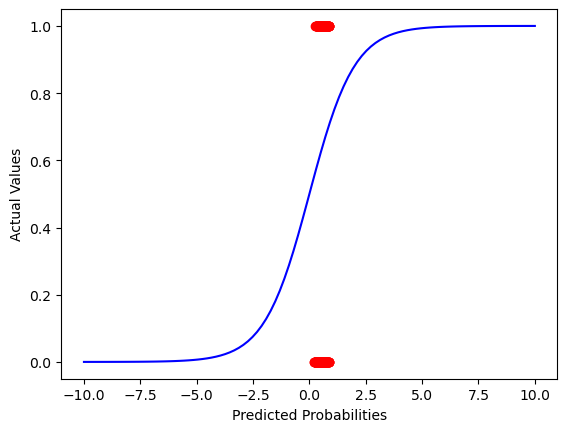

In [3]:
main("/Users/rohanshenoy/Downloads/train (4).csv")


[59.35483871 61.93548387 63.87096774 66.12903226 68.70967742 70.
 71.61290323 72.58064516 72.25806452 73.5483871  73.5483871  74.19354839
 74.51612903 75.16129032 75.16129032 75.16129032 75.16129032 75.16129032
 74.51612903 73.87096774 73.87096774 74.51612903 74.83870968 74.51612903
 74.83870968 75.16129032 75.16129032 74.83870968 74.83870968 74.83870968
 74.83870968 74.83870968 74.83870968 74.83870968 75.16129032 75.16129032
 75.16129032 75.16129032 75.16129032 74.83870968 74.83870968 74.83870968
 74.83870968 74.83870968 74.83870968 74.83870968 74.83870968 74.83870968
 74.83870968 74.83870968 74.83870968 74.83870968 74.83870968 74.83870968
 74.83870968 74.83870968 74.83870968 74.83870968 74.83870968 74.83870968
 74.83870968 74.83870968 74.51612903 74.51612903 74.51612903 74.51612903
 74.51612903 74.51612903 74.19354839 74.19354839 74.19354839 74.19354839
 74.19354839 74.19354839 74.19354839 74.19354839 74.19354839 74.19354839
 74.19354839 74.19354839 74.19354839 74.19354839 74.1935483

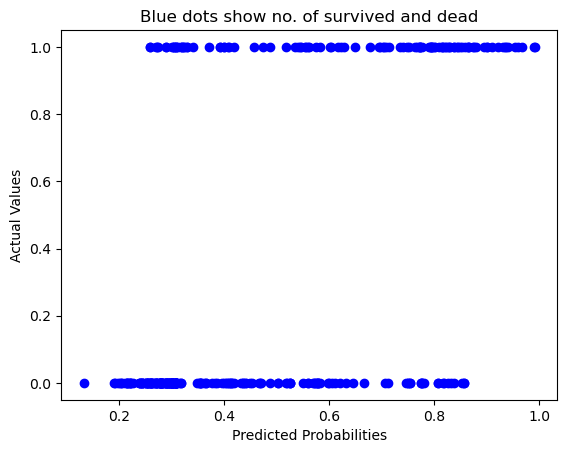

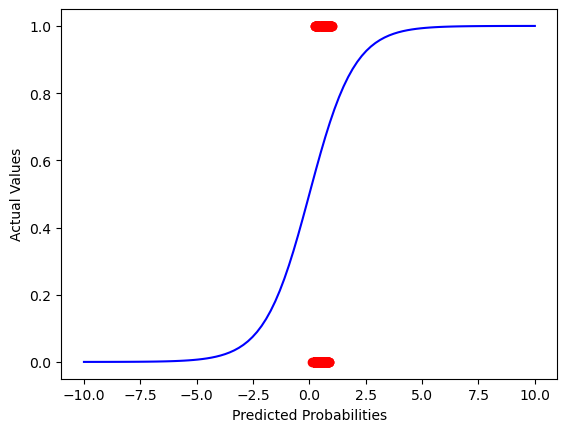

In [4]:
main("/Users/rohanshenoy/Downloads/test (2).csv")
